<a href="https://colab.research.google.com/github/vir097/Cardiovascular-Risk-Prediction--Viral-Shewale/blob/main/Cardiovascular_risk_prediction_Viral_Shewale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Tile: Cardiovascular Risk Prediction**

**Problem Statment:**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

**Data Description**

**Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

## **1. Load Dataset**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Viral/Cardiovascular Risk Prediction--Viral Shewale/data_cardiovascular_risk.csv",index_col='id')

## **2. Basic Inspection of the dataset**

In [ ]:
# Get the head of the dataset
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Get the tail of the dataset
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# get the shape of the dataset
df.shape

(3390, 16)

* **There are $3390$ rows and $16$ different attributes (columns) in the dataset.**

In [ ]:
# columns in the dataset
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Describtion of the dataset
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
# data type
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## **3. Data Cleaning**

### **3.1. Checking for the null values.**

In [4]:
# checking for missing values in the dataset
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**Missing value columns:**

*     education 
*     cigsPerDay 
*     BPMeds     
*     totchol  
*     BMI
*     heartRate   
*     glucose   

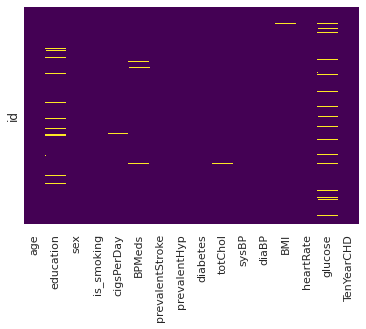

In [5]:
# Visualization of missing values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **3.2. Handling null values**

* The NaN values can be imputed by 
the aggregate (**mean or median**) of the remaining values in the columns.

**3.2.1. Handling NaN values from education column:-**


In [6]:
''' The NaN values can be imputed by 
the aggregate (mean or median) of the remaining values 
in the education column. '''

mean_ = round(df[~df['education'].isnull()]['education'].mean(),1)

median_ = df[~df['education'].isnull()]['education'].median()

[mean_, median_]

[2.0, 2.0]

* **The mean and median are the same. Hence we can use either one to replace with null values.**

In [7]:
# Handling NaN values from education column
df['education'].fillna(value= mean_ , inplace=True)

**3.2.2. Handling NaN values from cigarettes per day column:-**


In [8]:
# mean and median of the cig_per_day column
cig_mean = round(df[~df['cigsPerDay'].isnull()]['cigsPerDay'].mean(),1)

cig_median = df[~df['cigsPerDay'].isnull()]['cigsPerDay'].median()

[cig_mean, cig_median]

[9.1, 0.0]

In [9]:
df[df.cigsPerDay == 0].shape

(1703, 16)

In [10]:
df.is_smoking.value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

* **We find that for every instance of missing values in cigaretts per day, the patients reported that they smoke.**

In [11]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
cig_mean2 = df[df['is_smoking']=='YES']['cigsPerDay'].mean()
cig_median2 = df[df['is_smoking']=='YES']['cigsPerDay'].median()

[cig_mean2, cig_median2]

[18.345945945945946, 20.0]

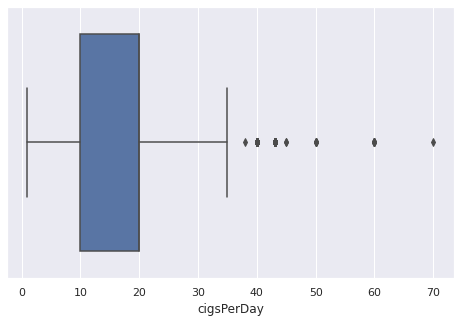

In [12]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(8,5))
df1=df[df['cigsPerDay']>0]
sns.boxplot(df1['cigsPerDay'])

* **The number of cigarettes smoked by the patients who smoke contains outliers. Hence, the missing values in the cigarettes per day column can be replaced with its median value.**

In [13]:
# Handling NaN values from cigarettes per day column
df['cigsPerDay'].fillna(value= cig_median2 , inplace=True)

**3.2.3. Handling NaN values from BPMeds column:-**


In [14]:
df.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [15]:
# Mode of the BPMeds
mode = df.BPMeds.mode()
mode

0    0.0
dtype: float64

* **Replacing the null values of BPMeds with most frequent entry.**

In [16]:
# Handling NaN values from BPMeds column
df['BPMeds'].fillna(value=0, inplace=True)

**3.2.4. Handling NaN values from Total cholesterol column:-**

In [17]:
# mean of the Total cholesterol column
chol_mean = df['totChol'].mean()
chol_mean

237.07428400954655

In [18]:
# median of the Total cholesterol column
chol_median=df['totChol'].median()
chol_median

234.0

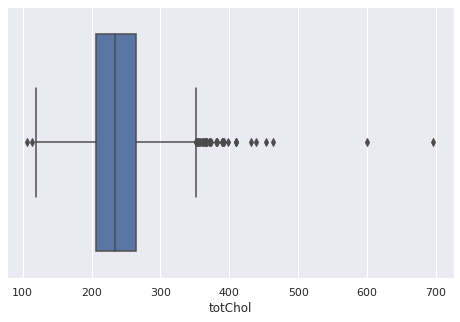

In [19]:
plt.figure(figsize=(8,5))
df1=df[df['totChol']>0]
sns.boxplot(df1['totChol'])

* **The total cholesterol contains outliers. Hence, the missing values in the totChol column can be replaced with its median value.**

In [20]:
df[df['totChol']>350].shape

(43, 16)

In [21]:
# Handling NaN values from totChol column
df['totChol'].fillna(value=chol_median, inplace=True)

**3.2.5. Handling NaN values from BMI column:-**

In [22]:
# Mean and Median of BMI column
BMI_mean = df.BMI.mean()
BMI_median = df.BMI.median()
[BMI_mean,BMI_median]

[25.7949644549763, 25.38]

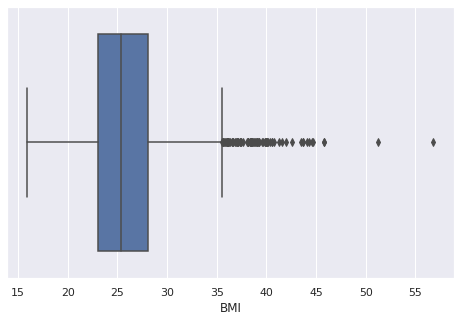

In [23]:
# checking for the outliers
plt.figure(figsize=(8,5))
df1=df[df['BMI']>0]
sns.boxplot(df1['BMI'])

* **The BMI contains outliers. Hence, the missing values in the BMI column can be replaced with its median value.**

In [24]:
# Handling NaN values from BMI column
df['BMI'].fillna(value=BMI_median, inplace=True)

**3.2.6. Handling NaN values from glucose column**

In [25]:
# mean of the glucose column
glu_mean = df.glucose.mean()
glu_mean

82.08651976668827

In [26]:
# median of the glucose column
glu_median = df.glucose.median()
glu_median

78.0

In [27]:
# mode of the glucose column
df.glucose.mode()

0    75.0
dtype: float64

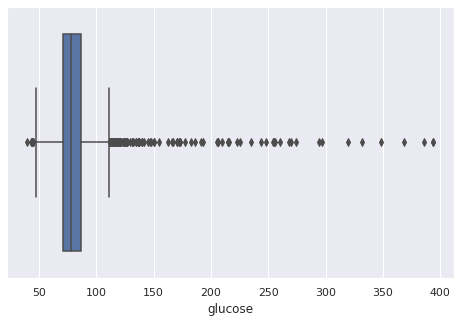

In [28]:
# checking for the outliers in the glucose column
plt.figure(figsize=(8,5))
df1=df[df['glucose']>0]
sns.boxplot(df1['glucose'])

* **The glucose contains outliers. Hence, the missing values in the glucose column can be replaced with its median value.**

In [29]:
df[df['glucose']>150].shape

(42, 16)

In [30]:
# handling missing value of glucose column
df['glucose'].fillna(value=glu_median,inplace=True)

In [31]:
# Replacing missing value of heartRate column with its median
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [32]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **4. Exploratory Data Analysis (EDA)**

### **4.1. Analysing the distribution of dependent variable**

In [ ]:
# Dependent Variable
dependent_variable = df['TenYearCHD']

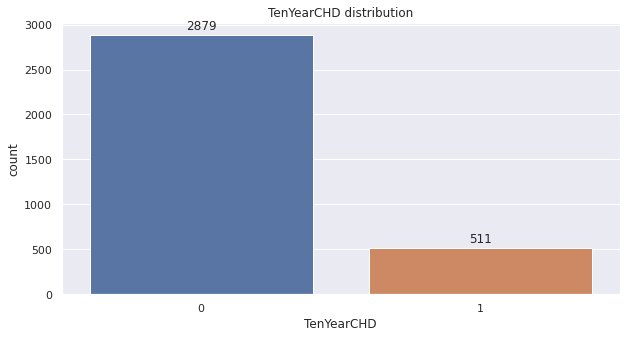

In [ ]:
# distribution of TenYearCHD
plt.figure(figsize=(10,5))
p=sns.countplot(x=df['TenYearCHD'])
plt.title('TenYearCHD distribution')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
511/(2879+511)

0.15073746312684366

* The dependent variable - 10 year risk of CHD is **Imbalanced**.
* Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations
* Only 15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

### **4.2. Analysing the distribution of continuous variable.**

In [ ]:
# Continuous Variables
continuous_variable= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

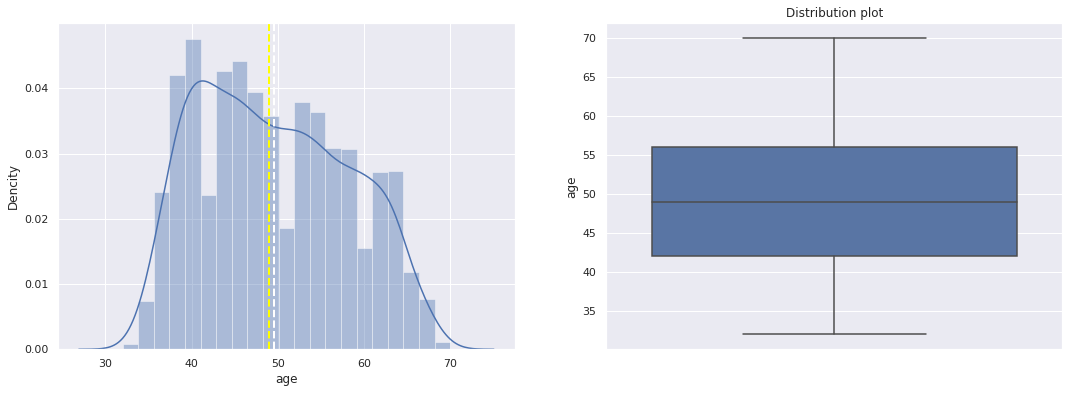

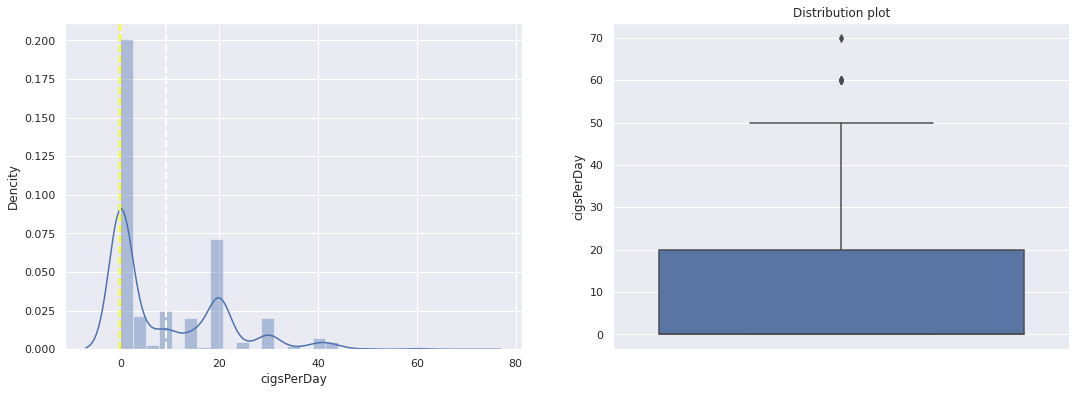

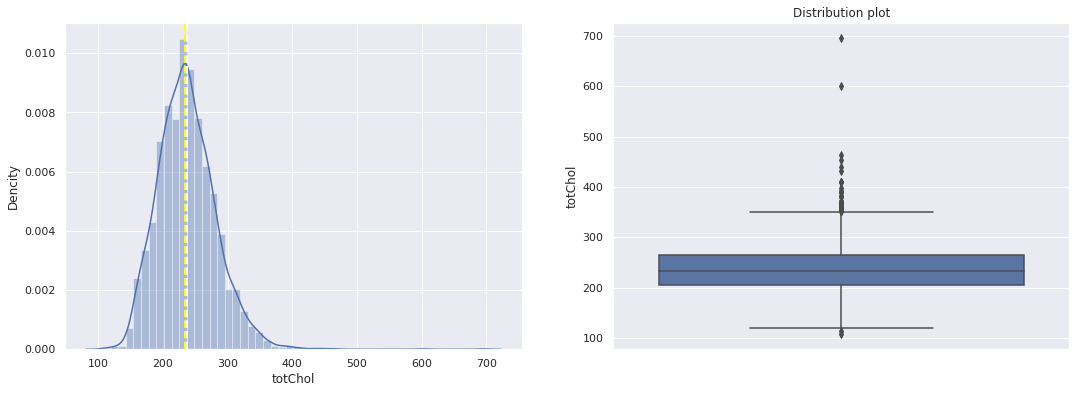

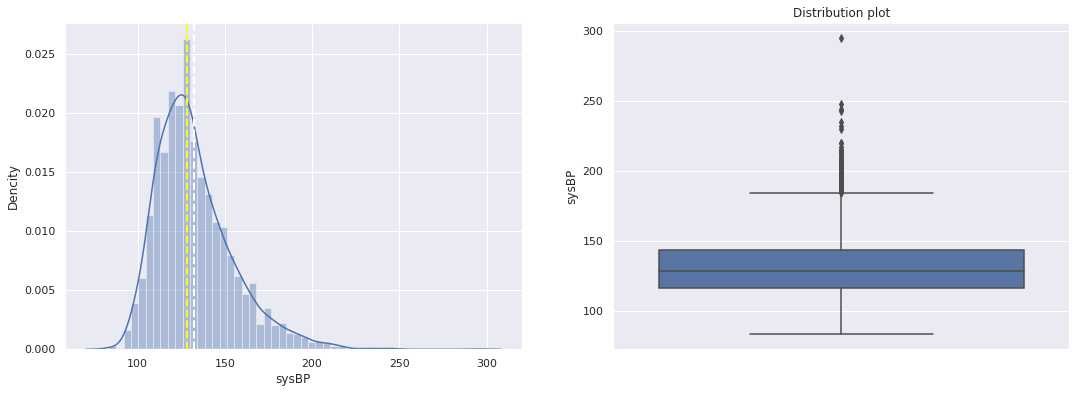

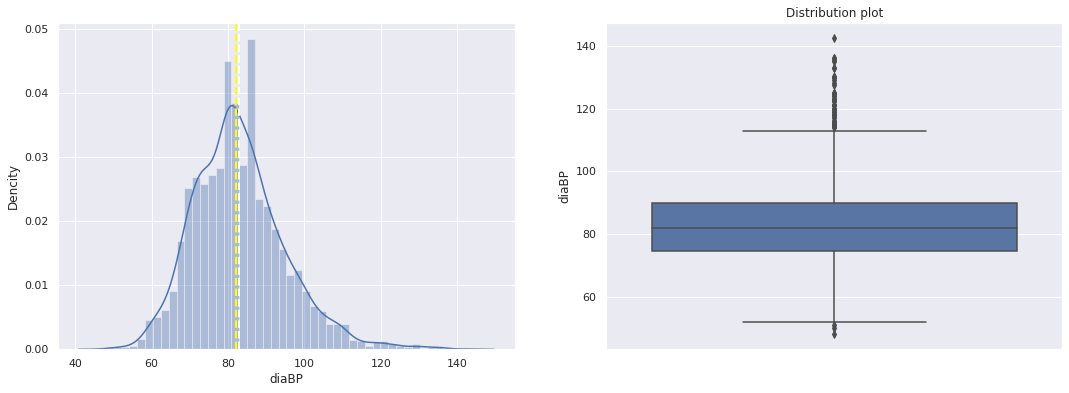

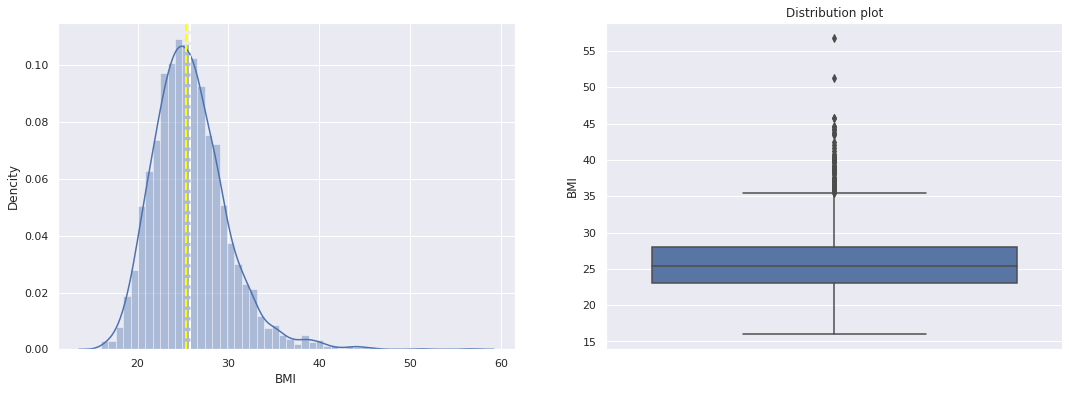

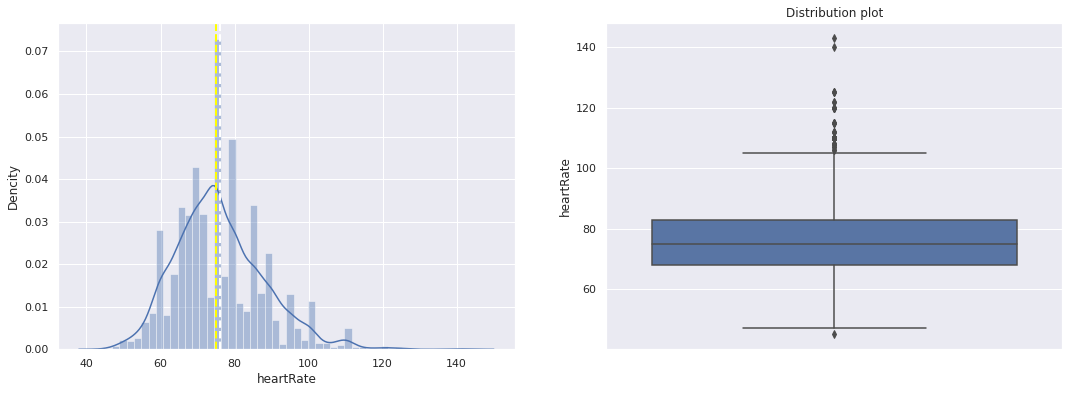

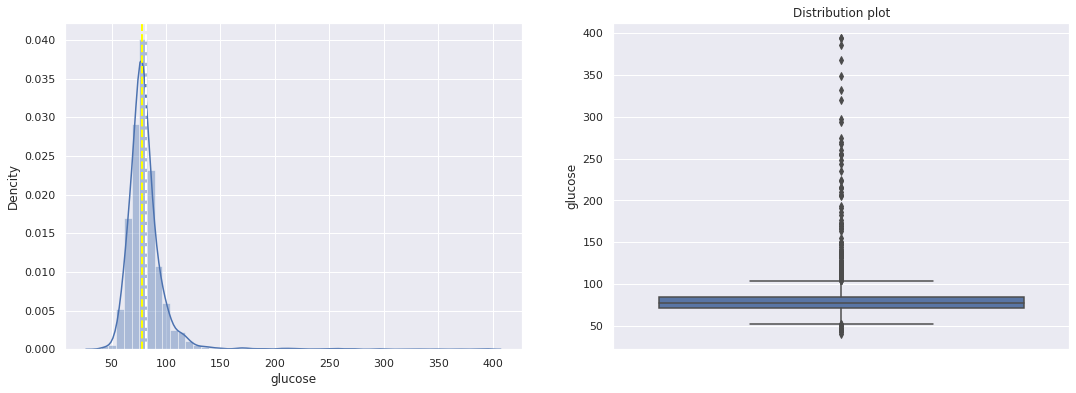

In [ ]:
# visualization of continuous variables
for var in continuous_variable:

    # Boxplot
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var])
    fig.set_title('Distribution plot')
    fig.set_ylabel(var)
    
    # Distplot
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var].dropna())
    plt.axvline(df[var].mean(), color='white', linestyle='dashed', linewidth=2)
    plt.axvline(df[var].median(), color='yellow', linestyle='dashed', linewidth=2)
    fig.set_ylabel('Dencity')
    fig.set_xlabel(var)

    plt.show()

* The distribution of several features is **skewed**, and **contains outliers.**

### **4.3. Analysing relation between Dependent variable and Independent continuous variable.**

Text(0.5, 1.0, 'TenYearCHD vs age')

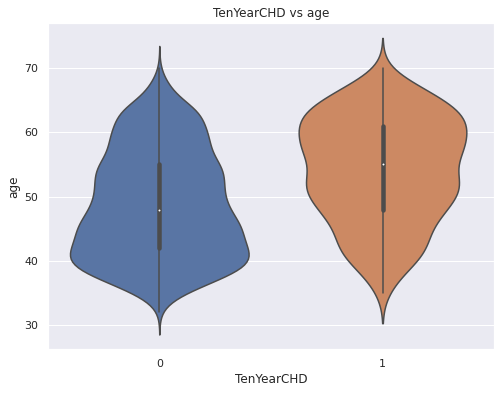

In [ ]:
# TenYearCHD vs age
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='age',data=df,size=6)
plt.title('TenYearCHD vs age')

* **From the above observation, we can see that the older person has a higher chance of Cardiovascular risk.**
* **A younger person has less chance of Cardiovascular risk.**

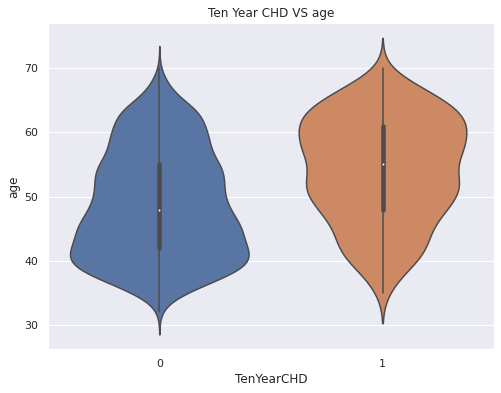

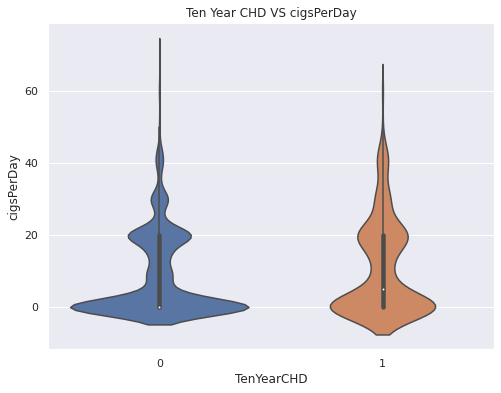

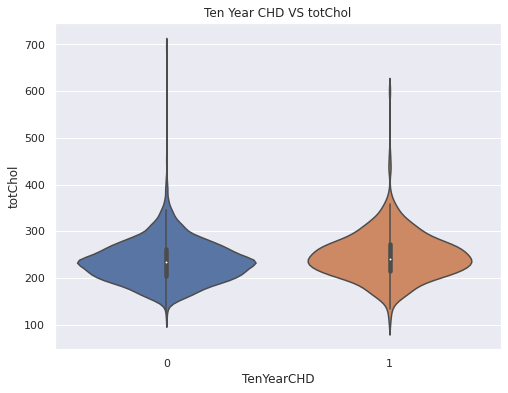

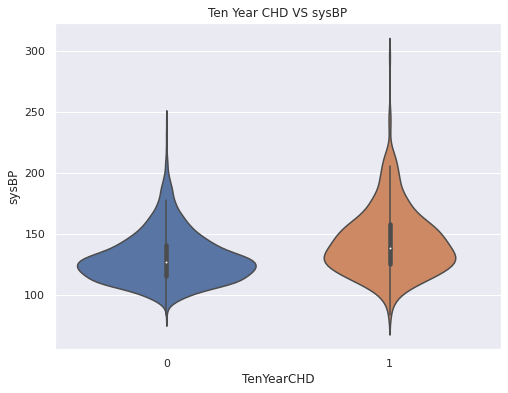

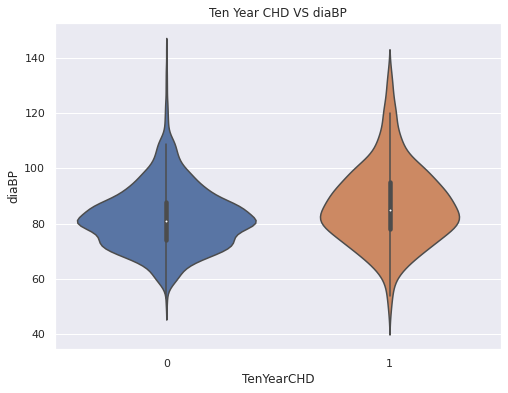

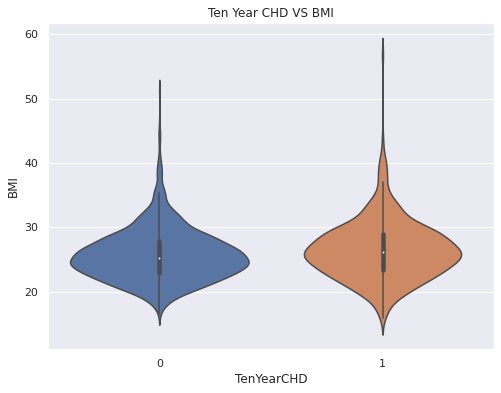

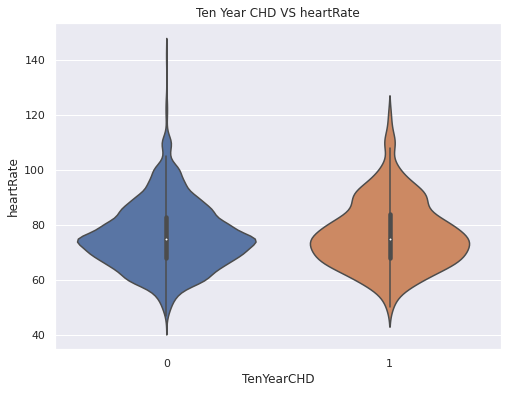

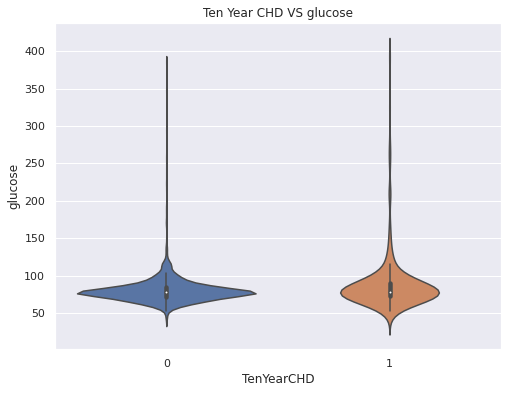

In [ ]:
# Visualising the relation between dependent variable and continuous independent variables
for var in continuous_variable:
  plt.figure(figsize=(8,6))
  sns.violinplot(x='TenYearCHD',y=var,data=df,size=6)
  plt.title('Ten Year CHD'+" VS "+ var)
plt.show()  

* **There is no conclusive evidence that we can conclude from continuous variables:.**

### **4.4. Analysing the distribution of the categorical independent variables:**

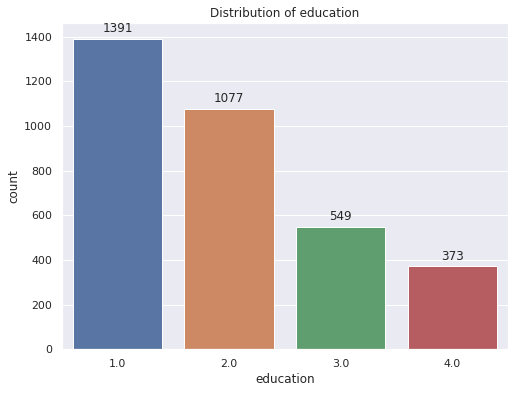

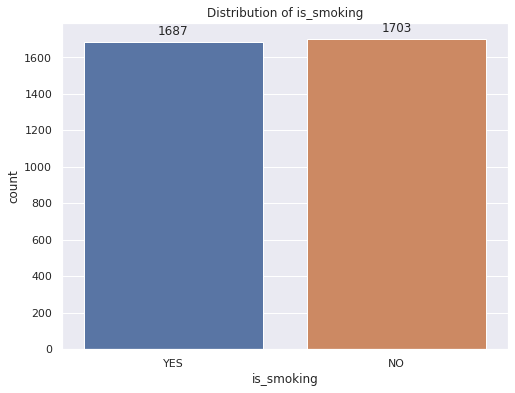

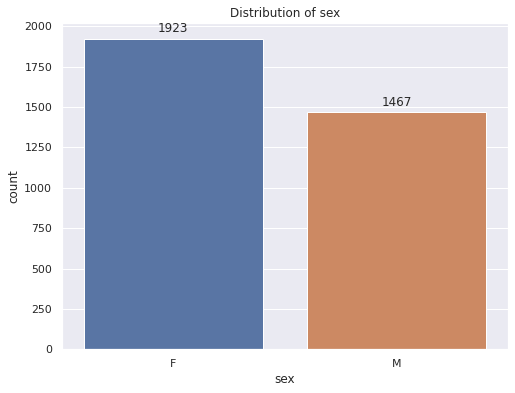

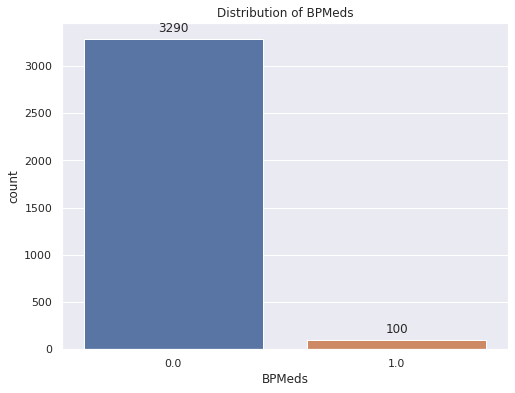

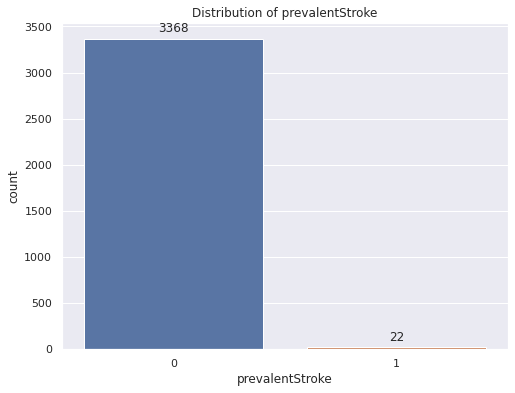

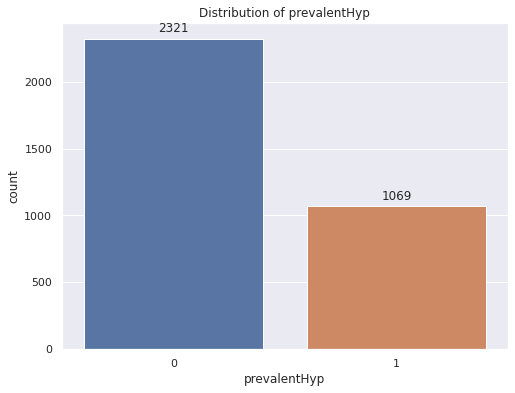

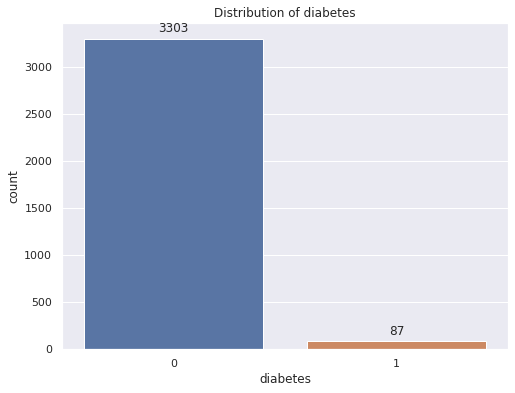

In [ ]:
# Categorical variables in the dataset
categorical_variables=['education','is_smoking','sex','BPMeds','prevalentStroke','prevalentHyp','diabetes']

# Visualization of discrette variables
for var in categorical_variables:
  plt.figure(figsize=(8,6))
  p=sns.countplot(x=df[var])
  plt.title('Distribution of'+" "+ var)
  plt.xlabel(var)
  for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Summary:**

* **Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.**

* **Half the patients are smokers.**

* **There are more female patients compared to male patients in a Cardiovascular study.**

* **There are relatively few individual who have had a stroke** *($22$ patients under the study have experienced a stroke).*

* **$1069$ patients have hypertension.**

* **$100$ patients are taking blood pressure medicine.** 

* **There are few individuals who have diabetes $87$.**

### **4.5. Analysing relation between Dependent variable and Independent categorical variable.**

<Figure size 720x360 with 0 Axes>

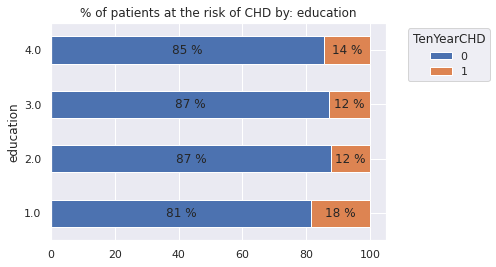

<Figure size 720x360 with 0 Axes>

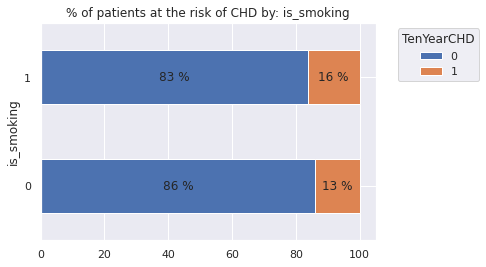

<Figure size 720x360 with 0 Axes>

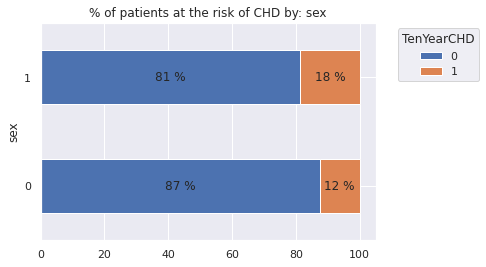

<Figure size 720x360 with 0 Axes>

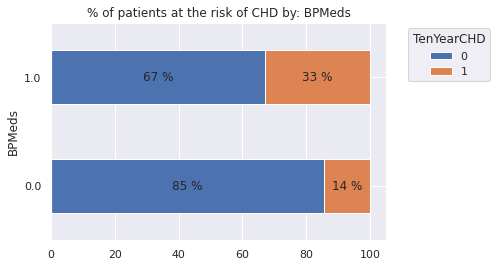

<Figure size 720x360 with 0 Axes>

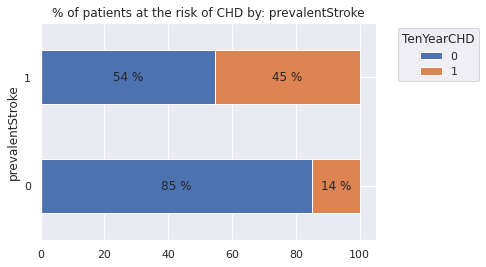

<Figure size 720x360 with 0 Axes>

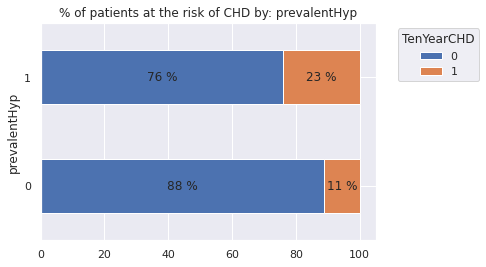

<Figure size 720x360 with 0 Axes>

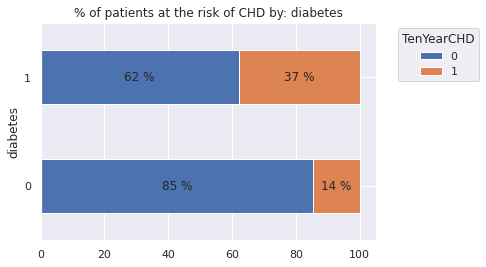

In [ ]:
# Analyzing the relationship between the dependent variable and categorical independent variables

# 100% stacked bar chart
dependent_variable = ['TenYearCHD']
for i in categorical_variables:
    x_var, y_var = i, dependent_variable[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

**Summary:**

* **18%, 11%, 12%, and 14% of the patients belonging to education levels 1, 2, 3, and 4 respectively were eventually diagnosed with CHD.**
* **Male patients have a significantly higher risk of CHD (18%) than female patients (12%).**
* **Patients who smoke have a significantly higher risk of CHD (16%) than patients who don't smoke (13%).**
* **Patients who take BP medicines have a significantly higher risk of CHD (33%) than other patients (14%).**
* **Patients who had experienced a stroke in their life have a significantly higher risk of CHD (45%) than other patients (14%).**
* **Hypertensive patients have a significantly higher risk of CHD (23%) than other patients (11%)**.
* **Diabetic patients have a significantly higher risk of CHD (37%) than other patients (14%).**

## **5. Encoding categorical features**

* **Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step.**

In [33]:
# Encoding is_smoking column 
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [34]:
# Encoding sex column 
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)

## **6. Handling multi-collinearity**

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. 
* Multicollinearity can be detected using various techniques, one such technique being the **Variance Inflation Factor(VIF).**

In [35]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
# calculate VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,41.230057
1,education,4.762567
2,sex,2.129752
3,is_smoking,5.025583
4,cigsPerDay,4.321178
5,BPMeds,1.133739
6,prevalentStroke,1.027151
7,prevalentHyp,2.413136
8,diabetes,1.583230
9,totChol,30.810583


* A **high VIF** indicates that the associated independent variable is highly collinear with the other variables in the model. 
* As we can see, systolic pressure and diastolic pressure have higher VIF.
* Blood pressure readings are given in two numbers. The top number is the maximum pressure the heart exerts while beating (systolic pressure). The bottom number is the amount of pressure in the arteries between beats (diastolic pressure).
* Systolic pressure reflects the force produced by the heart when it pumps blood out to the body, while diastolic blood pressure (the bottom number) is the pressure in your blood vessels when the heart is at rest.
* The top number (systolic) minus the bottom number (diastolic) is the **pulse pressure**.

**Pulse Pressure**

* **systolic pressure** $minus$  **diastolic pressure**

In [37]:
# Adding a new column to the dataset :- pulse pressure
df['pulse_pressure'] = df['sysBP']-df['diaBP']

In [38]:
# Droping sysBP and diaBP columns from the dataset
df.drop('diaBP',axis=1,inplace=True)
df.drop('sysBP',axis=1,inplace=True)

In [39]:
# calculating VIF after adding new column pulse pressure
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,39.726709
1,education,4.652612
2,sex,2.105610
3,is_smoking,5.022609
4,cigsPerDay,4.321004
5,BPMeds,1.132393
6,prevalentStroke,1.026997
7,prevalentHyp,2.119365
8,diabetes,1.565875
9,totChol,30.201304


Text(0.5, 0, 'pulse_pressure')

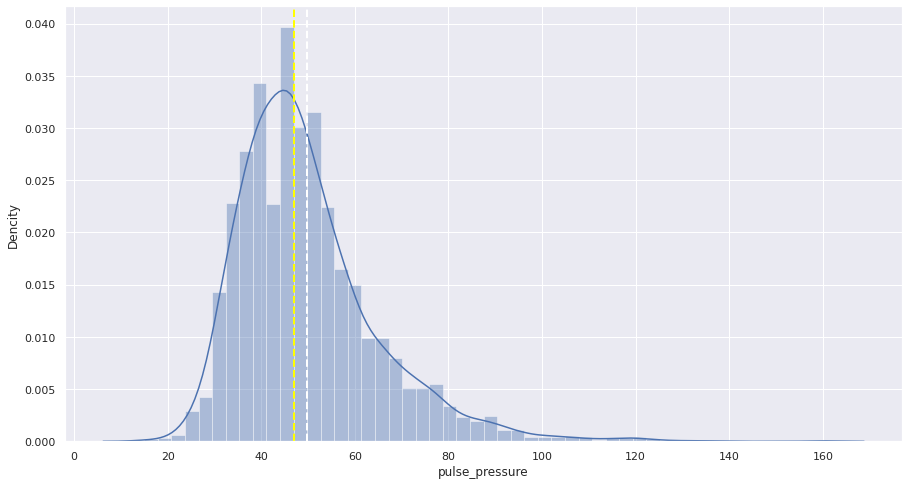

In [40]:
# distribution of pulse pressure
plt.figure(figsize=(15,8))
fig = sns.distplot(df['pulse_pressure'].dropna())
plt.axvline(df['pulse_pressure'].mean(), color='white', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='yellow', linestyle='dashed', linewidth=2)
fig.set_ylabel('Dencity')
fig.set_xlabel('pulse_pressure')

* **Pulse Pressure is positively skewed.**

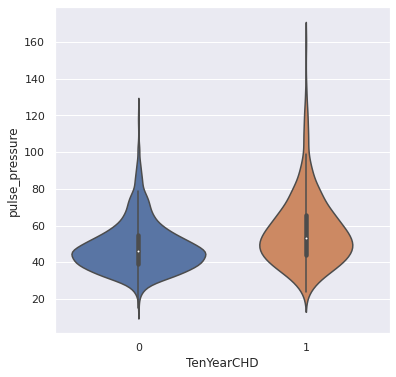

In [41]:
# visualization of pulse pressure vs dependent variable (TanYearCHD)
plt.figure(figsize=(6,6))
sns.violinplot(x='TenYearCHD',y='pulse_pressure',data=df,size=6)

* **From the visualization, we see that the higher the pulse pressure more chance of coronary heart disease over the period of 10 years.**
* **40 millimeters of mercury (mm Hg), which is considered a healthy pulse pressure.**

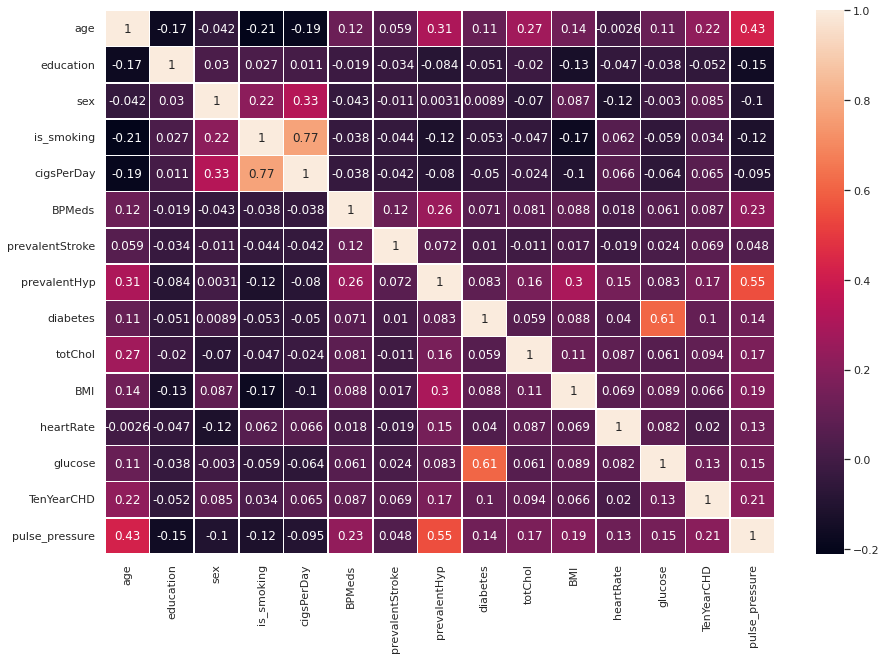

In [42]:
# Correlation 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,linewidths=0.5)

## **7. Transforming Data to reduce skewness**

*  If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions or may impair the interpretation of feature importance.
* Common transformations include:

      square root (sqrt(x))
      logarithmic (log(x))
      reciprocal (1/x)

* The **log transformation** is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

In [43]:
#  evaluating skewness is with pandas’ “.skew” method.
continuous_variable = ['age','cigsPerDay','totChol','BMI','heartRate','glucose','pulse_pressure']

(df[continuous_variable]).skew(axis = 0)

age               0.225796
cigsPerDay        1.204077
totChol           0.948170
BMI               1.025551
heartRate         0.676660
glucose           6.462108
pulse_pressure    1.412382
dtype: float64

* **Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

In [44]:
# log10 transformation
np.log10(df[continuous_variable]+1).skew(axis = 0)

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
BMI               0.370422
heartRate         0.165898
glucose           2.411348
pulse_pressure    0.354174
dtype: float64

* **We can clearly see that by log transformation of the continuous variables, we are able to reduce it's skew to some extent.**

In [45]:
# Implementing log transformation on continuous variables
df['age']  = np.log10(df['age']+1)
df['cigsPerDay']  = np.log10(df['cigsPerDay']+1)
df['totChol']  = np.log10(df['totChol']+1)
df['BMI']  = np.log10(df['BMI']+1)
df['heartRate'] = np.log10(df['heartRate']+1)
df['glucose'] = np.log10(df['glucose']+1)
df['pulse_pressure'] = np.log10(df['pulse_pressure']+1)

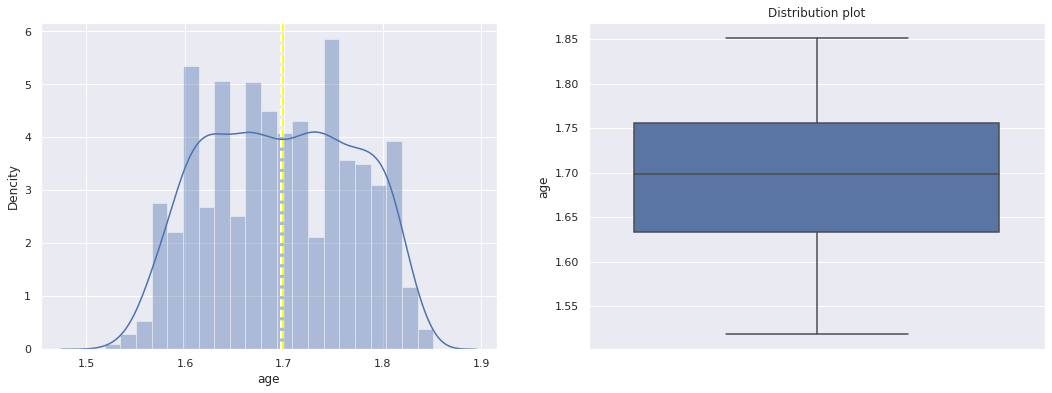

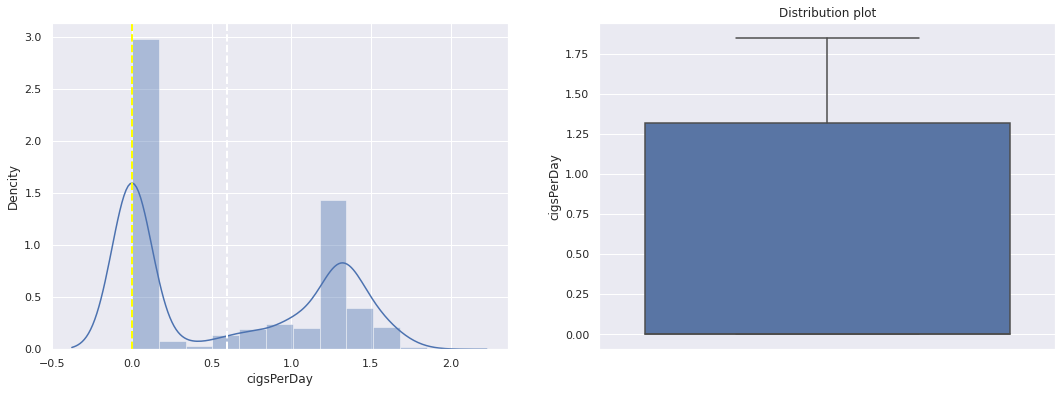

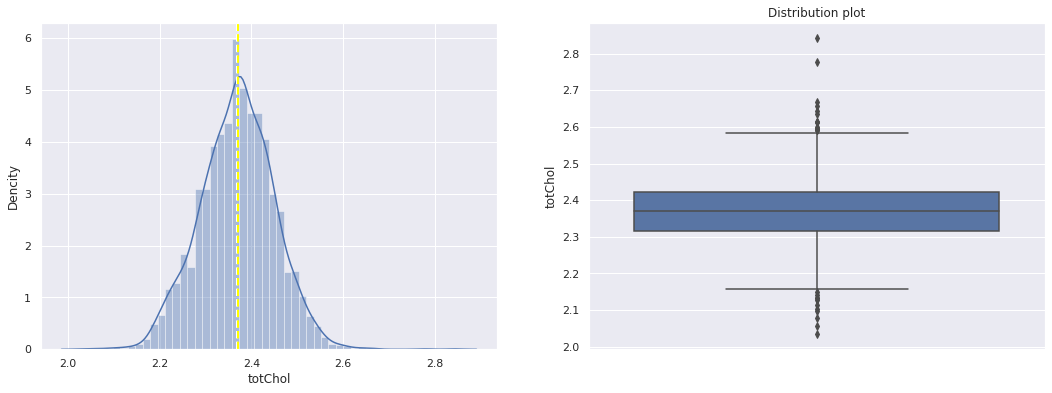

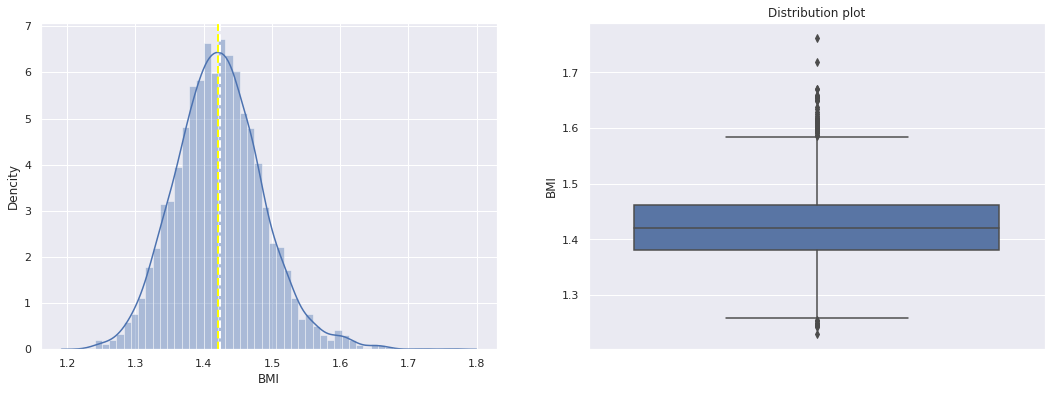

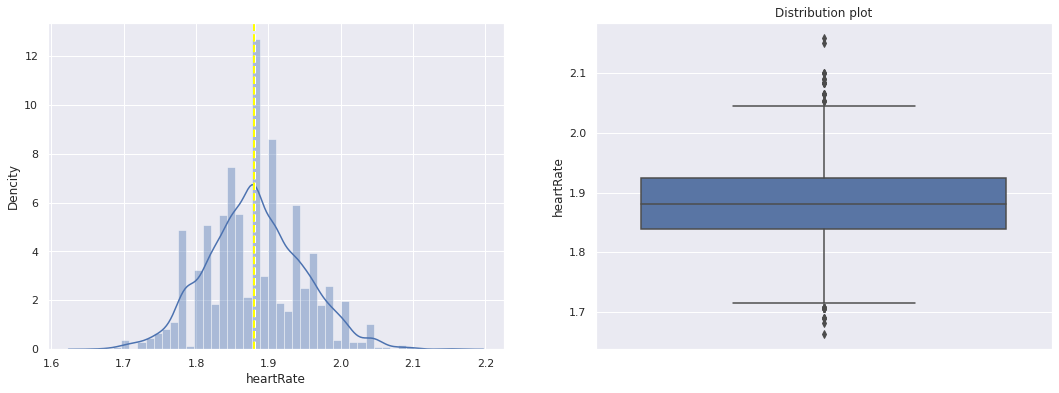

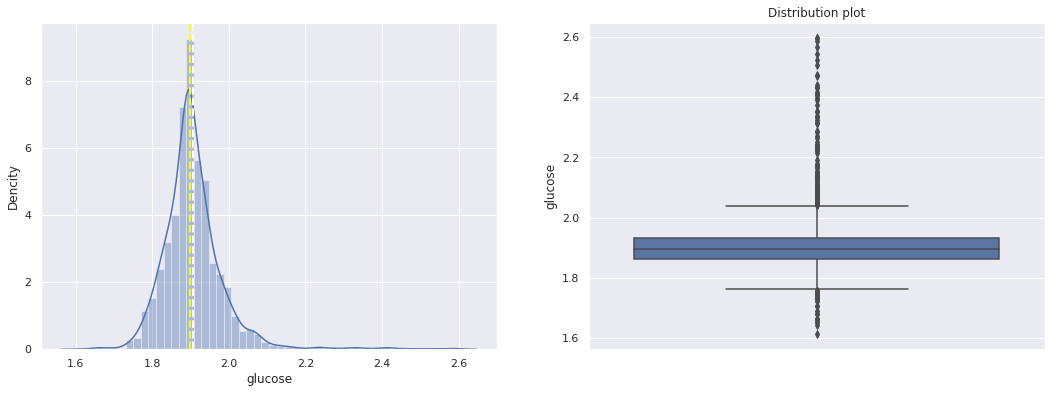

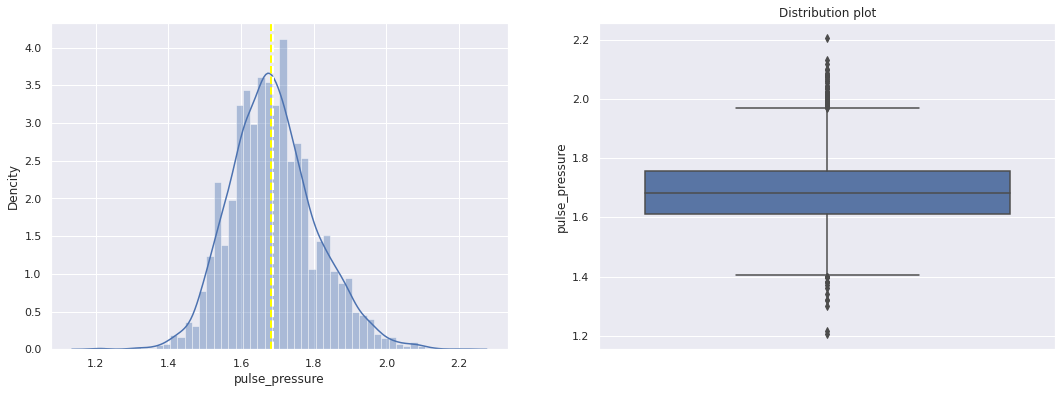

In [46]:
# Distribution of Transform data
# Checking outliers in the Transform data
for var in continuous_variable:
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var])
    fig.set_title('Distribution plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var].dropna())
    plt.axvline(df[var].mean(), color='white', linestyle='dashed', linewidth=2)
    plt.axvline(df[var].median(), color='yellow', linestyle='dashed', linewidth=2)
    fig.set_ylabel('Dencity')
    fig.set_xlabel(var)

    plt.show()

* Except for cigs_per_day, we have successfully been able to reduce the skewness in the continuous variables. Now, these distributions are closer to symmetric distribution.
* Except for age and cigs_per_day columns, the rest of the continuous variables contain outliers even after log transformation.

## **8. Data Preprocessing**

In [47]:
# Define variables
X=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']

### **8.1. Splitting dataset into train and test set**

In [48]:
# import library
from sklearn.model_selection import train_test_split

In [49]:
# split data into traing and test set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [50]:
print(X_train.shape)
print(X_test.shape)

(2542, 14)
(848, 14)


In [51]:
# Checking the train distribution of dependent variable
y_train.value_counts()

0    2161
1     381
Name: TenYearCHD, dtype: int64

In [52]:
381/2542

0.14988198269079464

In [53]:
# Checking the test distribution of dependent variable
y_test.value_counts()

0    718
1    130
Name: TenYearCHD, dtype: int64

In [54]:
130/848

0.15330188679245282

* **The train and test set contain almost equal proportion of results.**

### **8.2. Handaling outliers in trainig data**

**Below are some of the methods of treating the outliers:-**

* Trimming/removing the outlier
* Quantile based flooring and capping
* Mean/Median imputation

**Mean/Median imputation:-**


* As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [55]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['totChol', 'BMI', 'heartRate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

### **8.3. Handle Imbalanced Data For a Classification Problem**

* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease.

* In this case, it is vital to identify the minority classes correctly. So model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too.

* I oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
This ensures that the model has trained equally on all kinds of results, and it is not biased toward one particular result.

**Synthetic Minority Oversampling Technique (SMOT)**

In [56]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2542
Samples in the resampled dataset 4322


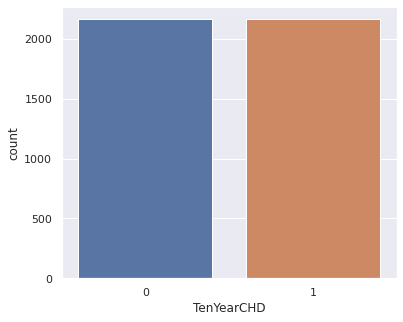

In [57]:
# visualization of dependent variable after SMOTE
plt.figure(figsize=(6,5))
sns.countplot(y_smote)

* Oversampling of the minority class using SMOTE was done successfully. Now, the model we build will be able to learn from both class without any bias.

### **8.4. scaling the dataset (StandardScaler)**

* StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.
* StandardScaler removes the mean and scales the data to the unit variance.

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.fit_transform(X_test)

In [60]:
# converting array to the dataframe
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

# **9. ML Classification models:**

**Model selection approach:**
* We are working on a binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie. Logistic Regression.
* Try other standard binary classification models like Naive Bayes, decision tree classifiers, and support vector machines.
* Use ensemble models with hyperparameter tuning to check whether they give better predictions.

**Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, **False Negatives are big concern** than False Positives.
* In other words, it doesn’t matter whether we raise a false alarm, but the actual positive cases should not go undetected.
After considering all the above points. The **recall score** would be the best **evaluation metric**.


* **Recall = TruePositives / (TruePositives + FalseNegatives)**

## **9.1. Logistic Regression**

In [102]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [103]:
# Biulding LR model
lr_model = LogisticRegression()

# fit data into the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

**Model Evaluation:-**

In [104]:
#Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)
lr_train_recall = recall_score(y_smote,lr_train_pred)
lr_train_recall

0.7075428042572883

In [105]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

# Test recall
lr_test_recall = recall_score(y_test,lr_test_pred)
lr_test_recall

0.7307692307692307

In [106]:
confusion_matrix(y_test,lr_test_pred)

array([[389, 329],
       [ 35,  95]])

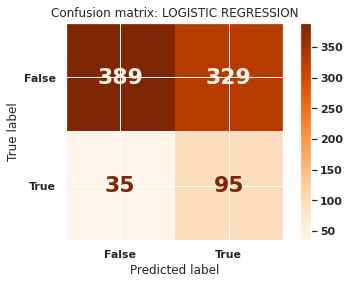

In [116]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

**Classification Report:-**

In [107]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       718
           1       0.22      0.73      0.34       130

    accuracy                           0.57       848
   macro avg       0.57      0.64      0.51       848
weighted avg       0.81      0.57      0.63       848



## **9.2. Decision tree classifier**

In [108]:
# Import library
from sklearn.tree import DecisionTreeClassifier

In [109]:

dt_model = DecisionTreeClassifier(random_state=0)

# Parametes
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }


# GridsearchCV 
grid_dt = GridSearchCV(dt_model,
                       dt_params,
                       cv=5)
grid_dt.fit(X_smote_scaled,y_smote)

# Best parameters
dt_best_params = grid_dt.best_params_
dt_best_params

{'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [110]:
# model building 
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=0)


# fit data into the model
dt_model.fit(X_smote_scaled,y_smote)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=0)

In [111]:
# predict train data
dt_train_pred = dt_model.predict(X_smote_scaled)

**Model Evaluation:-**

In [112]:
# predict test data
dt_test_pred = dt_model.predict(X_test_scaled)

# test recall
dt_test_recall = recall_score(y_test,dt_test_pred)
dt_test_recall

0.5692307692307692

In [113]:
# confusion metrics
confusion_matrix(y_test,dt_test_pred)

array([[504, 214],
       [ 56,  74]])

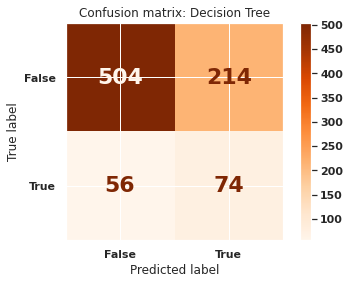

In [118]:
# confusion metrics
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: Decision Tree')
plt.show()

**Classification Report:-**

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       718
           1       0.26      0.57      0.35       130

    accuracy                           0.68       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.80      0.68      0.72       848



Text(0.5, 0, 'Relative Importance')

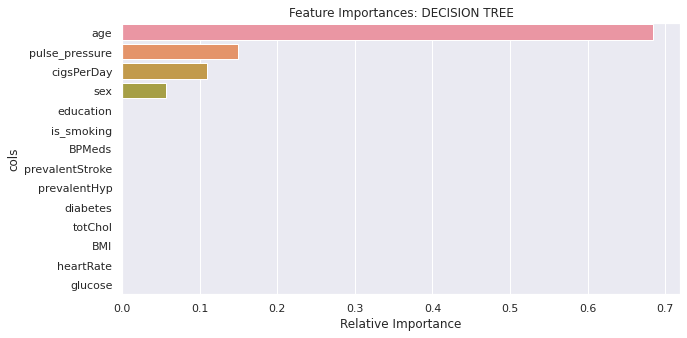

In [115]:
# feature importance
feature_names = X_train.columns
feature_imp = pd.DataFrame({'cols':feature_names, 'imp':dt_model.feature_importances_}).sort_values('imp', ascending=False).reset_index()


# visualising Feature importances
plt.figure(figsize=(10,5))
sns.barplot(data = feature_imp, y = 'cols', x = 'imp')
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')

* TOP 5 Important features on top of which decision tree was built:-
       * age
       * pulse pressure
       * cigPerDay
       * glucose
       * sex

## **9.3. Naive Bayes Classifier**

In [91]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

# Parametes
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

# GridsearchCV 
nb_gridsearch = GridSearchCV(nb_model,
                             param_grid_nb,
                             cv=5,
                             scoring= 'recall')


# Fitting data into gridsearch for best parameters
nb_gridsearch.fit(X_smote_scaled,y_smote)

# Best parameters
nb_best_params = nb_gridsearch.best_params_
nb_best_params

{'var_smoothing': 1.0}

In [92]:
# building the model
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

# fit data into the model
nb_model.fit(X_smote_scaled,y_smote)

GaussianNB(var_smoothing=1.0)

**Evaluation metrics:-**

In [93]:
# test data prediction
nb_test_pred = nb_model.predict(X_test_scaled)

# recall of test data
nb_test_recall = recall_score(y_test,nb_test_pred)
nb_test_recall

0.5230769230769231

In [94]:
# confusion metrics
confusion_matrix(y_test,nb_test_pred)

array([[507, 211],
       [ 62,  68]])

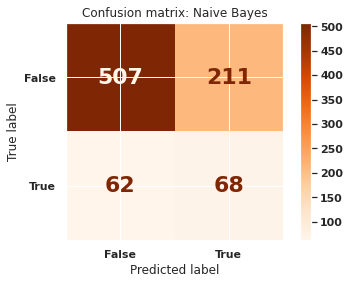

In [119]:
# confusion metrics
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: Naive Bayes')
plt.show()

**Classification Report:-**

In [95]:
# classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       718
           1       0.24      0.52      0.33       130

    accuracy                           0.68       848
   macro avg       0.57      0.61      0.56       848
weighted avg       0.79      0.68      0.72       848



## **9.4. Support Vector Machine (SVM)**

In [96]:
# Import Library
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [97]:
# SVM model parameters
svm_model = SVC()

# Parametes
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
             }

# Using gridsearchcv to find best parameters
svm_gridsearch = RandomizedSearchCV(svm_model,
                              svm_params,
                              cv=6)
svm_gridsearch.fit(X_smote_scaled,y_smote)


svm_best_params = svm_gridsearch.best_params_
svm_best_params             

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [98]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=10, gamma=0.01)

In [99]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

# Test recall
svm_test_recall = recall_score(y_test,svm_test_pred)
svm_test_recall

0.6153846153846154

In [100]:
confusion_matrix(y_test,svm_test_pred)

array([[413, 305],
       [ 50,  80]])

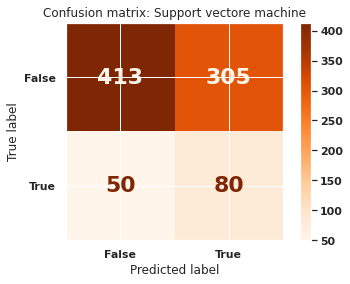

In [120]:
# confusion metrics
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: Support vectore machine')
plt.show()

**Classification Report:**

In [101]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       718
           1       0.21      0.62      0.31       130

    accuracy                           0.58       848
   macro avg       0.55      0.60      0.51       848
weighted avg       0.79      0.58      0.64       848



## **9.5. XG Boost classifier**

In [62]:
import xgboost as xgb

In [63]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}


# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=5,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

# print best parameters
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [65]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

# fit
xgb_model.fit(X_smote_scaled,y_smote)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

**Evaluation of built model:**

In [66]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)

# test recall
xgb_test_recall = recall_score(y_test,xgb_test_pred)
xgb_test_recall

0.8

In [67]:
# confusion metrics
print(confusion_matrix(y_test,xgb_test_pred))

[[288 430]
 [ 26 104]]


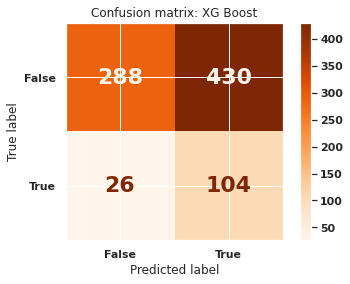

In [121]:
# confusion metrics
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG Boost')
plt.show()

**Classificcation Report:**

In [68]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.40      0.56       718
           1       0.19      0.80      0.31       130

    accuracy                           0.46       848
   macro avg       0.56      0.60      0.44       848
weighted avg       0.81      0.46      0.52       848



Text(0.5, 0, 'Relative Importance')

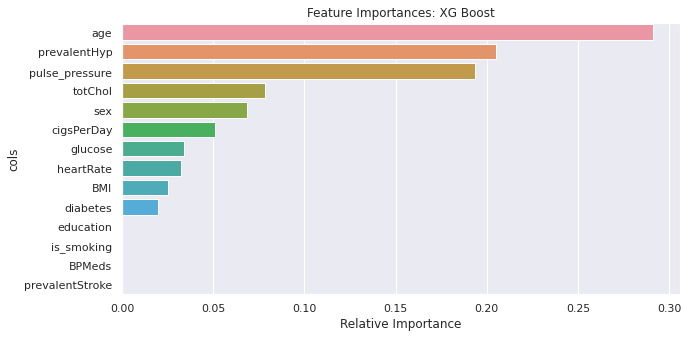

In [69]:
# feature importance
feature_names = X_train.columns
feature_imp = pd.DataFrame({'cols':feature_names, 'imp':xgb_model.feature_importances_}).sort_values('imp', ascending=False).reset_index()

# visualising Feature importances
plt.figure(figsize=(10,5))
sns.barplot(data = feature_imp, y = 'cols', x = 'imp')
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')

## **9.6. Random Forest classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}


# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=5,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

# print best parameters
rf_best_params 

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [72]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

# fit dataset
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

**Evaluation of Built model:**

In [73]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

# test recall
rf_test_recall = recall_score(y_test,rf_test_pred)
rf_test_recall

0.6384615384615384

In [74]:
# confusion metrics
print(confusion_matrix(y_test,rf_test_pred))

[[446 272]
 [ 47  83]]


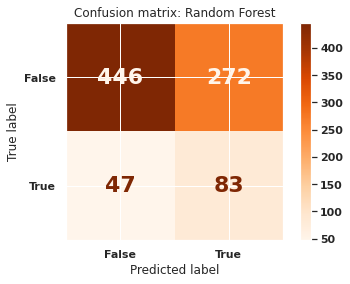

In [122]:
# confusion metrics
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: Random Forest')
plt.show()

**Classification Report:**

In [75]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74       718
           1       0.23      0.64      0.34       130

    accuracy                           0.62       848
   macro avg       0.57      0.63      0.54       848
weighted avg       0.80      0.62      0.68       848



Text(0.5, 0, 'Relative Importance')

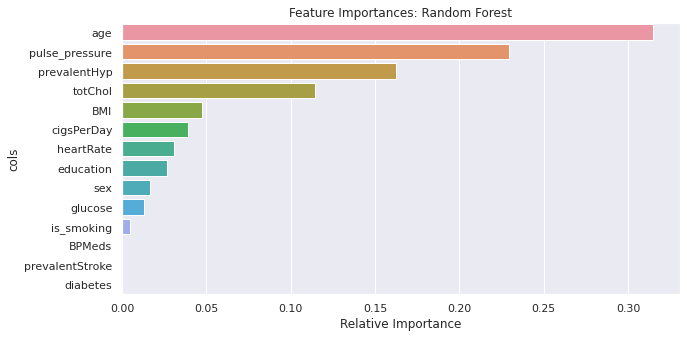

In [76]:
# feature importance
feature_names = X_train.columns
feature_imp = pd.DataFrame({'cols':feature_names, 'imp':rf_model.feature_importances_}).sort_values('imp', ascending=False).reset_index()

# visualising Feature importances
plt.figure(figsize=(10,5))
sns.barplot(data = feature_imp, y = 'cols', x = 'imp')
plt.title('Feature Importances: Random Forest')
plt.xlabel('Relative Importance')

* TOP 5 Important features on top of which decision tree was built:-
       * age
       * pulse pressure
       * prevalentHyp
       * tolChol
       * IBM

## **9.7. Model Summary:**

In [123]:
# Summarizing the results obtained
from prettytable import PrettyTable


test = PrettyTable(['Sl. No.','Classification Model','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_test_recall*100])
test.add_row(['2','Decision Tree',dt_test_recall*100])
test.add_row(['3','Naive Bayes',nb_test_recall*100])
test.add_row(['4','Support Vector Machines',svm_test_recall*100])
test.add_row(['5','XG Boost',xgb_test_recall*100])
test.add_row(['6','Random Forests',rf_test_recall*100])
print(test)

+---------+-------------------------+--------------------+
| Sl. No. |   Classification Model  |  Test Recall (%)   |
+---------+-------------------------+--------------------+
|    1    |   Logistic Regression   | 73.07692307692307  |
|    2    |      Decision Tree      | 56.92307692307692  |
|    3    |       Naive Bayes       | 52.307692307692314 |
|    4    | Support Vector Machines | 61.53846153846154  |
|    5    |         XG Boost        |        80.0        |
|    6    |      Random Forests     | 63.84615384615384  |
+---------+-------------------------+--------------------+


<Figure size 576x432 with 0 Axes>

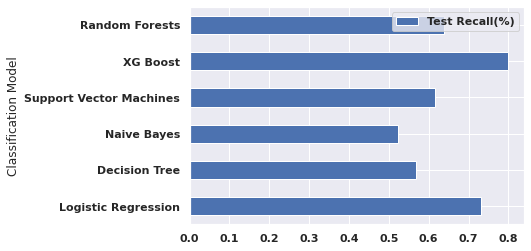

In [131]:
# initialize data
data = [['Logistic Regression',lr_test_recall], 
        ['Decision Tree',dt_test_recall], 
        ['Naive Bayes',nb_test_recall],
        ['Support Vector Machines',svm_test_recall],
        ['XG Boost',xgb_test_recall],
        ['Random Forests',rf_test_recall]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Classification Model', 'Test Recall(%)'])

# Model Comparision
plt.figure(figsize=(8,6))
df.plot(x='Classification Model',kind='barh')

* **The XG Boost has the highest test recall score compared to other models built.**


# **10. Conclusion:**

* I trained 6 Machine Learning models using the training dataset with hyperparameter tuning to improve the model performance.
* The dataset contained some null values, outliers and also data were unbalanced. Unbalance data were handled using SMOTE to reduce bias on one outcome.
* The Recall was chosen as the model evaluation metric because it doesn’t matter whether we raise a false alarm, but the actual positive cases should not go undetected. 
* The initial set of predictions obtained using the baseline model, i.e. logistic regression model, and other commonly used classification models was also built in search of better predictions.
* The model I developed must have a high recall score. It is ok if the model incorrectly identifies a healthy patient as a high-risk patient because this would not lead to death, but if the high-risk patient was incorrectly labelled as healthy, it could result in fatality.
* We were able to create a model with a recall of just 0.80 because of limited data available and limited computational power available.
* A recall score of 0.80 indicates that out of 100 individuals with the illness, our model will be able to classify only 80 as high-risk patients, while the remaining 20 will be misclassified.
* From the analysis, I found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.
* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.